In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np


# Load the Excel file
file_path = 'output_animate.xlsx'
xls = pd.ExcelFile(file_path)

# Load the sheets
df_result_anime = pd.read_excel(xls, 'results')
df_q_react_length_anime = pd.read_excel(xls, 'q_react_length')

df_result_anime.head()
df_q_react_length_anime.head()

,time[minutes],queue_preparation_length scenario 0
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


The df_log_batches_entered column:

What does this data describe?
This data logs the lifecycle of each batch within the system, allowing you to track:

When batches enter the system.
When they exit the system.
The duration each batch spends in the system (calculated as t_left_system - t_entered_system).

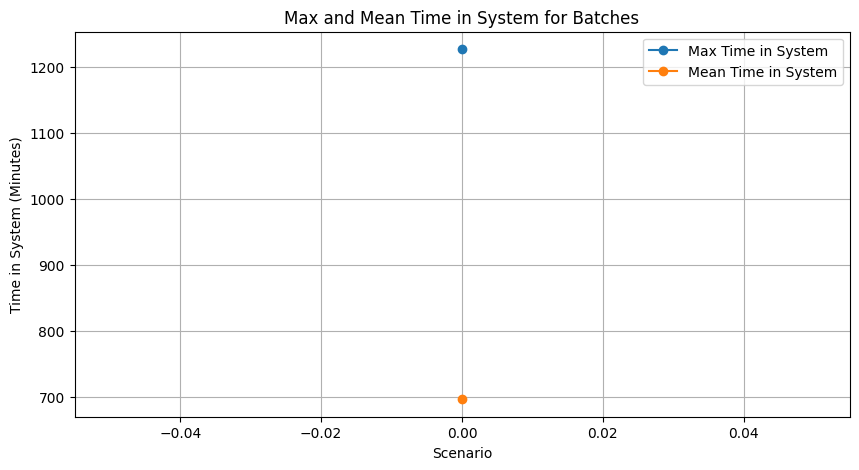

In [6]:

# Convert the df_log_batches_entered column from string to a list of dictionaries for easier analysis
df_result_anime['df_log_batches_entered'] = df_result_anime['df_log_batches_entered'].apply(ast.literal_eval)

# Extracting the 'time_in_system_max' and 'time_in_system_mean' for bottleneck identification
time_in_system_max = df_result_anime['time_in_system_max']
time_in_system_mean = df_result_anime['time_in_system_mean']

# Visualize Time in System
plt.figure(figsize=(10, 5))
plt.plot(df_result_anime.index, time_in_system_max, label='Max Time in System', marker='o')
plt.plot(df_result_anime.index, time_in_system_mean, label='Mean Time in System', marker='o')
plt.title('Max and Mean Time in System for Batches')
plt.xlabel('Scenario')
plt.ylabel('Time in System (Minutes)')
plt.legend()
plt.grid(True)
plt.show()

# Further visualization can be done based on queues and logs in the next step


The Max Time in System is significantly higher (around 1200 minutes) compared to the Mean Time in System (around 700 minutes). This indicates that while most batches exit the system within a reasonable amount of time, there are some outliers that take much longer to process.

The large difference between the max and mean times suggests a potential bottleneck affecting a few specific batches, leading them to spend more time in the system compared to others

In [26]:
#Load the Excel files
files = 'output.xlsx'
data = pd.ExcelFile(files)

# Load the sheets
df_results = pd.read_excel(data, 'results')
df_q_react_length = pd.read_excel(data, 'q_react_length')

df_results.head
df_q_react_length.head()

,time[minutes],queue_preparation_length scenario 0,Unnamed: 2,time[minutes].1,queue_preparation_length scenario 1,Unnamed: 5,time[minutes].2,queue_preparation_length scenario 2,Unnamed: 8,time[minutes].3,queue_preparation_length scenario 3,Unnamed: 11,time[minutes].4,queue_preparation_length scenario 4
0,0,0,NaN,0,0,NaN,0,0,NaN,0,0,NaN,0,0
1,1,0,NaN,1,0,NaN,1,0,NaN,1,0,NaN,1,0
2,2,0,NaN,2,0,NaN,2,0,NaN,2,0,NaN,2,0
3,3,0,NaN,3,0,NaN,3,0,NaN,3,0,NaN,3,0
4,4,0,NaN,4,0,NaN,4,0,NaN,4,0,NaN,4,0


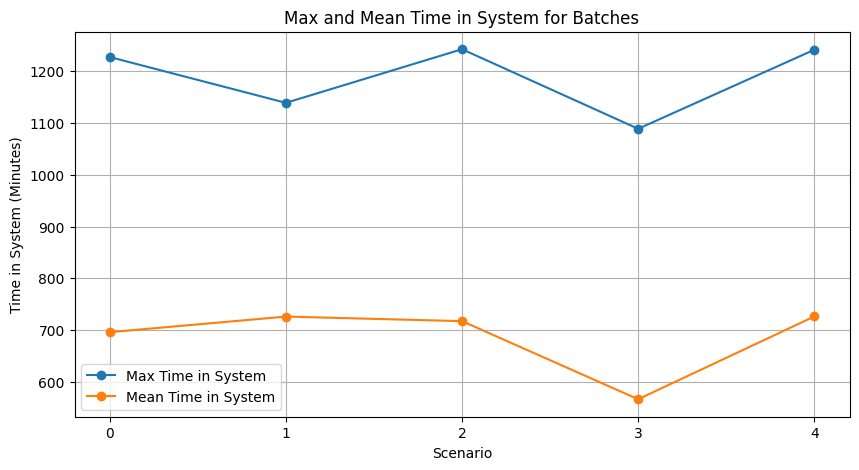

In [24]:
# Function to safely parse each entry in df_log_batches_entered
def safe_parse(log_entry):
    try:
        return ast.literal_eval(log_entry)
    except (ValueError, SyntaxError):
        # Return the entry as-is if parsing fails
        return log_entry

# Apply the safe parsing function to the 'df_log_batches_entered' column
df_results['df_log_batches_entered'] = df_results['df_log_batches_entered'].apply(safe_parse)
# Now you can continue with your analysis or visualization
# For example:
time_in_system_max = df_results['time_in_system_max']
time_in_system_mean = df_results['time_in_system_mean']

# Adjust x to have integer values
x = np.arange(0, len(time_in_system_max))
# Visualize Time in System using the correct DataFrame index
plt.figure(figsize=(10, 5))
plt.plot(df_results.index, time_in_system_max, label='Max Time in System', marker='o')
plt.plot(df_results.index, time_in_system_mean, label='Mean Time in System', marker='o')
plt.xticks(x)
plt.title('Max and Mean Time in System for Batches')
plt.xlabel('Scenario')
plt.ylabel('Time in System (Minutes)')
plt.legend()
plt.grid(True)
plt.show()

Max Time in System: The max time fluctuates significantly between scenarios, with values ranging from about 1080 minutes to 1240 minutes. This suggests that in some scenarios, batches may encounter significant delays or bottlenecks, causing a few batches to take much longer to process.

Mean Time in System: The mean time is relatively stable, hovering between 600 to 750 minutes, except in scenario 3, where it dips significantly to around 560 minutes. This indicates that while most batches spend a consistent amount of time in the system, some scenarios lead to more consistent processing efficiency (lower mean time).

In [23]:
import pprint
pprint.pprint(df_results['df_log_batches_entered'][0])

[{'t_entered_system': 25.92299307934845,
  't_left_system': 287.92275737083884,
  'type': 'product_1'},
 {'t_entered_system': 58.96131070793963,
  't_left_system': 301.34804150683397,
  'type': 'product_1'},
 {'t_entered_system': 23.572107582160257,
  't_left_system': 353.80866930677524,
  'type': 'product_2'},
 {'t_entered_system': 22.327285332782683,
  't_left_system': 355.4178492484835,
  'type': 'product_1'},
 {'t_entered_system': 32.16356457936607,
  't_left_system': 412.67869570557633,
  'type': 'product_2'},
 {'t_entered_system': 17.023549835661143,
  't_left_system': 456.7952541286707,
  'type': 'product_2'},
 {'t_entered_system': 140.06709134118807,
  't_left_system': 528.702893491677,
  'type': 'product_1'},
 {'t_entered_system': 32.151991313771454,
  't_left_system': 539.7989404569585,
  'type': 'product_1'},
 {'t_entered_system': 50.530529484907646,
  't_left_system': 550.4754618718754,
  'type': 'product_1'},
 {'t_entered_system': 47.007615965964575,
  't_left_system': 613

In [14]:
# Calculate the difference between max and mean time for each scenario
df_results['time_difference'] = df_results['time_in_system_max'] - df_results['time_in_system_mean']

# Find the scenario with the largest difference
max_diff_scenario = df_results.loc[df_results['time_difference'].idxmax()]
print(f"Scenario with the largest difference between max and mean time: {max_diff_scenario['scenario']}")
print(f"Difference: {max_diff_scenario['time_difference']} minutes")


Scenario with the largest difference between max and mean time: 1
Difference: 531.5485557063239 minutes


In [15]:
# Filter the dataset to only include Scenario 1
df_scenario_1 = df_results[df_results['scenario'] == 1]


In [16]:
# Analyze the time in the system for each batch in Scenario 1
def calculate_processing_times(log_entry):
    batch_times = []
    for entry in log_entry:
        if 't_left_system' in entry and 't_entered_system' in entry:
            processing_time = entry['t_left_system'] - entry['t_entered_system']
            batch_times.append({
                'type': entry['type'],
                'processing_time': processing_time
            })
    return batch_times

# Apply the function to calculate processing times for Scenario 1
df_scenario_1['processing_times'] = df_scenario_1['df_log_batches_entered'].apply(calculate_processing_times)

# Flatten the processing times for easier analysis
batch_times_data = []
for index, row in df_scenario_1.iterrows():
    for batch in row['processing_times']:
        batch_times_data.append({
            'type': batch['type'],
            'processing_time': batch['processing_time']
        })

df_batch_times_scenario_1 = pd.DataFrame(batch_times_data)


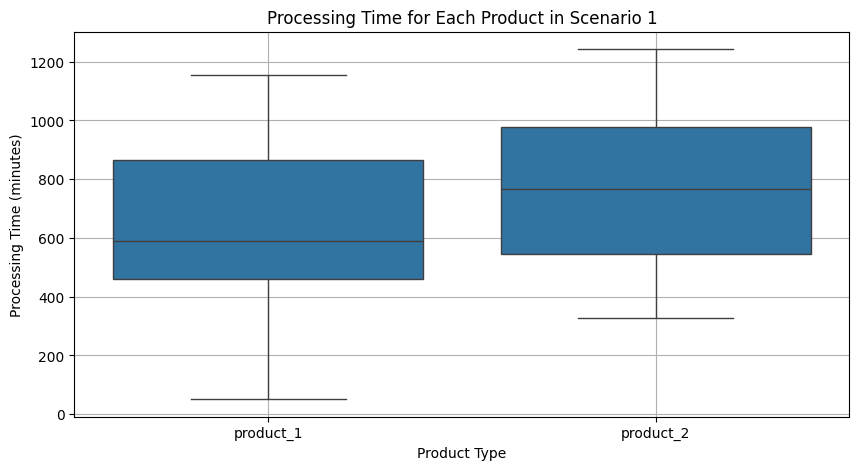

In [18]:
# Visualize the processing time for each product in Scenario 1
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_batch_times_scenario_1, x='type', y='processing_time')
plt.title('Processing Time for Each Product in Scenario 1')
plt.ylabel('Processing Time (minutes)')
plt.xlabel('Product Type')
plt.grid(True)
plt.show()



# What does it mean?

Product 2 take in average longer to produce, here is where the bottlenecks are. 

## Second sheat 

The q_react_length sheet contains queue length information for different scenarios over time, and it tracks the queue length for what appears to be a preparation stage in multiple scenarios.

- time[minutes]: The time in minutes.
- queue_preparation_length: The length of the queue at the preparation stage for each scenario.
- Separate columns for each scenario (scenario 0, scenario 1, etc.).

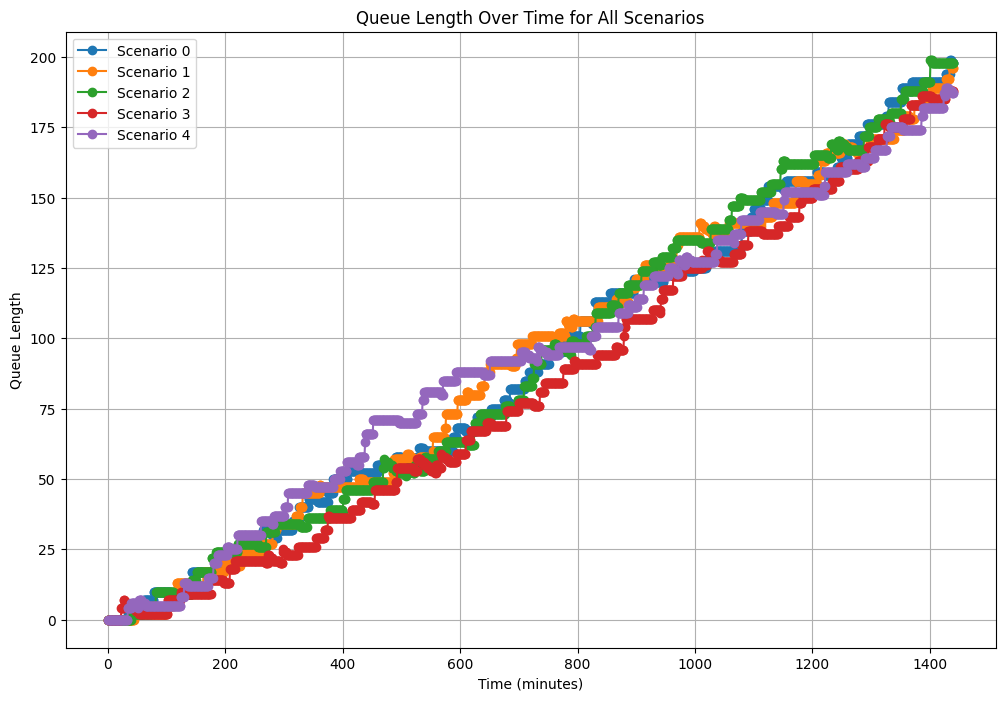

In [31]:
# Extract the queue length for all scenarios over time
time = df_q_react_length['time[minutes]']  # Time column (same for all scenarios)
queue_length_scenario_0 = df_q_react_length['queue_preparation_length scenario 0']
queue_length_scenario_1 = df_q_react_length['queue_preparation_length scenario 1']
queue_length_scenario_2 = df_q_react_length['queue_preparation_length scenario 2']
queue_length_scenario_3 = df_q_react_length['queue_preparation_length scenario 3']
queue_length_scenario_4 = df_q_react_length['queue_preparation_length scenario 4']

# Create a plot with all scenarios
plt.figure(figsize=(12, 8))

# Plot for Scenario 0
plt.plot(time, queue_length_scenario_0, label='Scenario 0', marker='o')
# Plot for Scenario 1
plt.plot(time, queue_length_scenario_1, label='Scenario 1', marker='o')
# Plot for Scenario 2
plt.plot(time, queue_length_scenario_2, label='Scenario 2', marker='o')
# Plot for Scenario 3
plt.plot(time, queue_length_scenario_3, label='Scenario 3', marker='o')
# Plot for Scenario 4
plt.plot(time, queue_length_scenario_4, label='Scenario 4', marker='o')

plt.title('Queue Length Over Time for All Scenarios')
plt.xlabel('Time (minutes)')
plt.ylabel('Queue Length')
plt.grid(True)
plt.legend()
plt.show()


# What this means:

Scenario 3 and Scenario 4 are more efficient at handling the preparation stage, preventing long queues from forming.
These scenarios could serve as a model for optimizing the other scenarios, especially Scenario 1, where the queue length grows significantly over time.
